## Problem 1

Use the VC inequality to get that N is approximately 453000, choose C

## Problem 2

In [12]:
## Plotting exercise!
# Because some bounds are implicit in epsilon, I will use simulations instead of plotting the entire continuous function
import numpy as np
DELTA = 0.05
D_VC = 50

def mH(N):
    return N ** D_VC
def VC(N):
    return np.sqrt(8/N * np.log(4 * mH(2 * N)/DELTA))

def Rad(N):
    return np.sqrt(2 * np.log(2 * N * mH(2*N)/N)) + np.sqrt(2 * np.log(1/DELTA)/N) + 1/N

def parrondo(N):
    return 1/N + 0.5*np.sqrt(4/N**2 + 4/N * np.log(6*mH(2*N)/DELTA))

def devroye(N):
    return (2/N + np.sqrt(4/N**2 + 4*(1-2/N)*(1/(2*N))*(np.log(4) + 2*D_VC*np.log(N) - np.log(DELTA))))/(2*(1-2/N))

In [24]:
x = np.arange(9900, 10000, dtype = np.float64)

vc = np.array([VC(i) for i in x])
rad = np.array([Rad(i) for i in x])
par = np.array([parrondo(i) for i in x])
dev = np.array([devroye(i) for i in x])

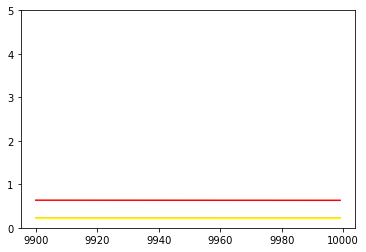

In [30]:
import matplotlib.pyplot as plt
plt.plot(x, vc, 'red')
plt.plot(x, rad, 'blue')
plt.plot(x, par, 'orange')
plt.plot(x, dev, 'yellow')
plt.ylim(0, 5)
plt.show()
# So D is the best answer.

## Problem 3



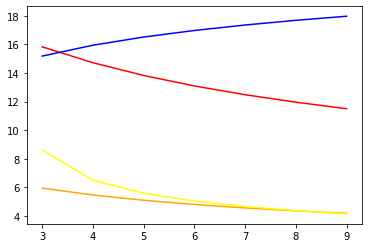

In [35]:
x = np.arange(3, 10, dtype = np.float64)
vc = np.array([VC(i) for i in x])
rad = np.array([Rad(i) for i in x])
par = np.array([parrondo(i) for i in x])
dev = np.array([devroye(i) for i in x])
plt.plot(x, vc, 'red')
plt.plot(x, rad, 'blue')
plt.plot(x, par, 'orange')
plt.plot(x, dev, 'yellow')
plt.show()
# C is the smallest

## Problem 4

In [46]:
# I'm pretty sure we did something similar in lecture but let's do it anyway for practice
import random
from scipy.optimize import curve_fit

def target(x):
    return np.sin(np.pi * x)

def func(x, a):
    return a * x
slopes = 0
n = 1000
for i in range(n):
    x1, x2 = random.uniform(-1, 1), random.uniform(-1, 1)
    y1, y2 = target(x1), target(x2)
    popt, _ = curve_fit(func, [x1, x2], [y1, y2])
    slopes += popt[0]

slopes/n
## E

1.4163598115140847

## Problem 5

In [68]:
## To calculate bias I need to find the area between the line ax and sin (pi x)
from scipy import integrate
n = 1000
ahat = 1.41636
biases = 0
for i in range(n):
    x1, x2 = random.uniform(-1, 1), random.uniform(-1, 1)
    y1, y2 = target(x1), target(x2)
    popt, _ = curve_fit(func, [x1, x2], [y1, y2])
    a = popt[0]
    diff = lambda x: (ahat* x - np.sin(np.pi * x))**2
    bias = integrate.quad(diff, -1, 1)[0]/2
    biases += bias
biases /n
## C

0.2670091024094489

## Problem 6

In [69]:
n = 1000
biases = 0
# I will compute total error, then compute variance from that.
for i in range(n):
    x1, x2 = random.uniform(-1, 1), random.uniform(-1, 1)
    y1, y2 = target(x1), target(x2)
    popt, _ = curve_fit(func, [x1, x2], [y1, y2])
    diff = lambda x: (popt[0]* x - np.sin(np.pi * x))**2/2
    bias = integrate.quad(diff, -1, 1)[0]
    biases += bias
biases /n
## So variance is total error - bias, so #A

0.5074445091023324

## Problem 7

In [71]:
# Constant case
errors = 0
for i in range(n):
    x1, x2 = random.uniform(-1, 1), random.uniform(-1, 1)
    y1, y2 = target(x1), target(x2)
    b = 0.5 * (y1 + y2)
    
    diff = lambda x: (b - np.sin(np.pi * x))**2/2
    error = integrate.quad(diff, -1, 1)[0]
    errors += error
errors/n

0.7545466470993307

In [72]:
## Y = ax case had error ~ 0.5
# Now we do the y = ax + b case
errors = 0
def func1 (x, a, b):
    return a * x + b
for i in range(n):
    x1, x2 = random.uniform(-1, 1), random.uniform(-1, 1)
    y1, y2 = target(x1), target(x2)
    popt, _ = curve_fit(func1, [x1, x2], [y1, y2])
    
    diff = lambda x: (popt[0] * x + popt[1] - np.sin(np.pi * x))**2/2
    error = integrate.quad(diff, -1, 1)[0]
    errors += error
errors/n
# Wow this is terrible! 

/Users/bguo/opt/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


1.988204961797243

In [73]:
def func2 (x, a):
    return a * x**2

for i in range(n):
    x1, x2 = random.uniform(-1, 1), random.uniform(-1, 1)
    y1, y2 = target(x1), target(x2)
    popt, _ = curve_fit(func2, [x1, x2], [y1, y2])
    
    diff = lambda x: (popt[0] * x**2 - np.sin(np.pi * x))**2/2
    error = integrate.quad(diff, -1, 1)[0]
    errors += error
errors/n
# Choose B

42.66443857920539

## Problem 8

Basically the growth function is 2^N until q = N, then it is not exactly that. So this happens when N = q, which will mess up the growth function for N+1. So the break point is q. C

## Problem 9

If you look at the upper bound, the VC dimension can only be as good as the worst VC dimension out of all of them. THis is because if you can shatter some somesubset of the graph then you can shatter the whole thing. Therefore the inequality (b) is tight.

## Problem 10